In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import random as rand
from tqdm import tqdm
import random as rand

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

import sys
import os
src_path = "../../src/"
sys.path.append(src_path)
import support_modeling as sp

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Lectura de csv
df = pd.read_csv("../../data/df_te.csv")
df.sample(5)

,Precio,Tipo de Propiedad,Exterior,Habitaciones,Baños,Provincia,Mostrar Dirección,Tiene Video,Tiene Plano,Tiene 360,Ascensor,Tamaño_robust,Distancia_robust
315,700.0,681.418301,681.49481,689.131332,685.558824,697.296774,688.751480,678.348548,677.895197,675.286765,679.870971,0.366667,1.255894
128,735.0,689.034696,681.49481,689.034696,685.558824,697.296774,688.751480,678.348548,677.895197,706.864550,684.527919,-0.966667,-0.103008
298,750.0,681.418301,681.49481,689.131332,685.558824,697.296774,680.507463,678.348548,677.895197,675.286765,679.870971,0.700000,0.738688
99,750.0,689.034696,681.49481,689.034696,685.558824,697.296774,688.751480,678.348548,691.007843,675.286765,684.527919,-0.133333,-0.539430
123,600.0,681.418301,681.49481,683.142537,685.558824,697.296774,680.507463,678.348548,677.895197,675.286765,684.527919,1.033333,0.491666


In [3]:
# Creacion de x (variables explicativas) e y (variable respuesta)
x=df.drop("Precio",axis=1)
y=df[["Precio"]]
x_train, x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 5, 10]  
}

# Configurar el GridSearchCV
model_GradientBoostingRegressor = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  
    scoring='neg_mean_squared_error',  
    verbose=2,
    n_jobs=-1  
)

# Ajustar el modelo con el conjunto de entrenamiento reducido
print("\n Iniciando búsqueda de hiperparámetros con GridSearchCV...\n")
model_GradientBoostingRegressor.fit(x_train, y_train)

# Evaluar el modelo en el conjunto de validación
best_model = model_GradientBoostingRegressor.best_estimator_



 Iniciando búsqueda de hiperparámetros con GridSearchCV...

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [5]:
y_train_pred=best_model.predict(x_train)
y_test_pred=best_model.predict(x_test)

In [6]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.808500,25.595500,1122.256500,33.500100
Test,0.385200,41.945000,2919.503300,54.032400
Diferenceia Train-Test,0.423300,-16.349500,-1797.246800,-20.532300
Porcentaje diferencia (%),109.891000,-63.876500,-160.145800,-61.290300
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.087318,4.940525,295.650966,6.402921
Influencia dif media (%),0.061900,2.391900,262.933900,3.003800
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.084063,4.756373,284.630972,6.164261
Influencia dif mediana (%),0.059600,2.302700,253.133400,2.891900


- R2_score: Indica sobreajuste, con una caída del 80.85% en entrenamiento al 38.52% en prueba.
- MAE: El error absoluto promedio es mayor en prueba, pero su diferencia no es tan crítica (-16.35).
- MSE: Los errores grandes afectan significativamente, con un aumento de 160.15% en prueba.
- RMSE: Similar a MSE, muestra un aumento significativo del error (61.29%) en prueba.

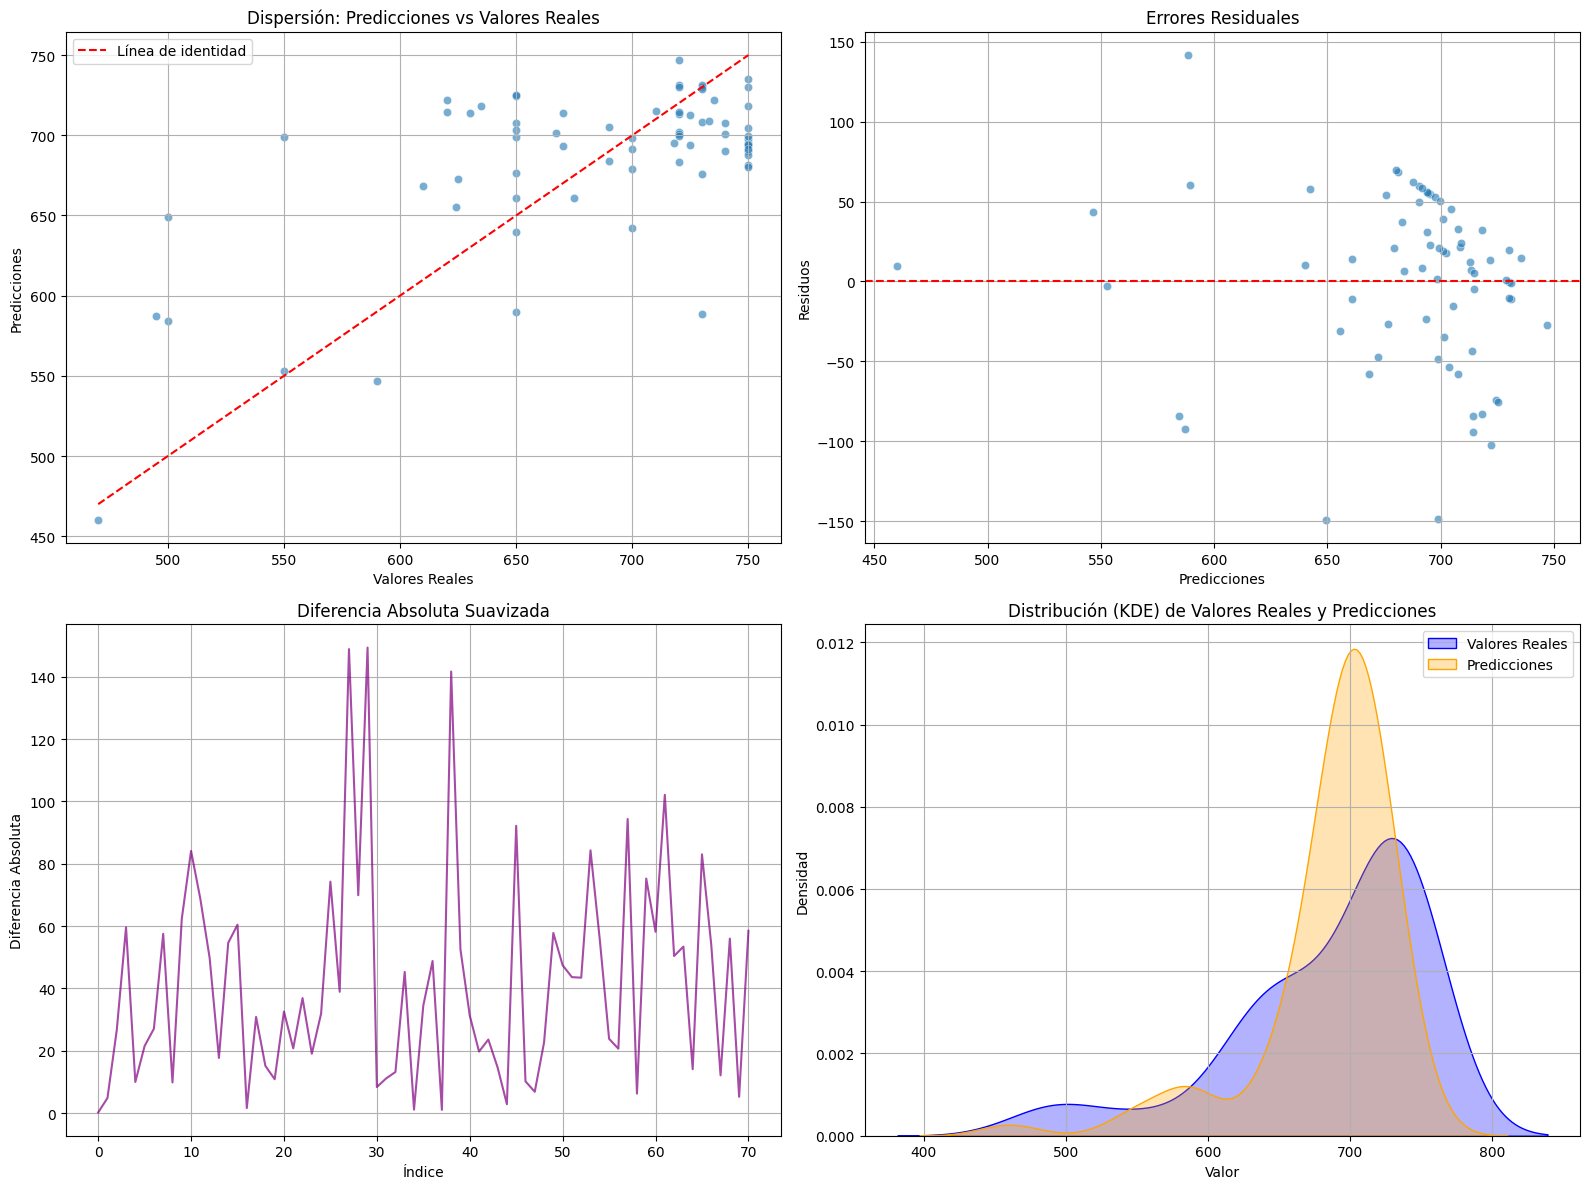

In [7]:
sp.comparativa_graficos(y_test, y_test_pred)

### PROBAMOS A MEJORAR EL MODELO ELIMINANDO VARIABLES CON POCA REPERCUSIÓN

Calculamos la correlación de las variables con "price" para ver cuales pueden ser eliminadas por no ser representativas en el modelo

Correlaciones con 'Precio':
Precio               1.000000
Provincia            0.536239
Tiene 360            0.176591
Habitaciones         0.107024
Baños                0.105857
Tiene Plano          0.083271
Tiene Video          0.081027
Mostrar Dirección    0.046862
Tipo de Propiedad    0.036378
Ascensor             0.030791
Exterior             0.028026
Tamaño_robust       -0.076692
Distancia_robust    -0.516021
Name: Precio, dtype: float64


c:\Users\alexc\Desktop\GIT\Proyecto7-PrediccionCasas\notebooks\2-Modeling\../../src\support_modeling.py:375: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="viridis")


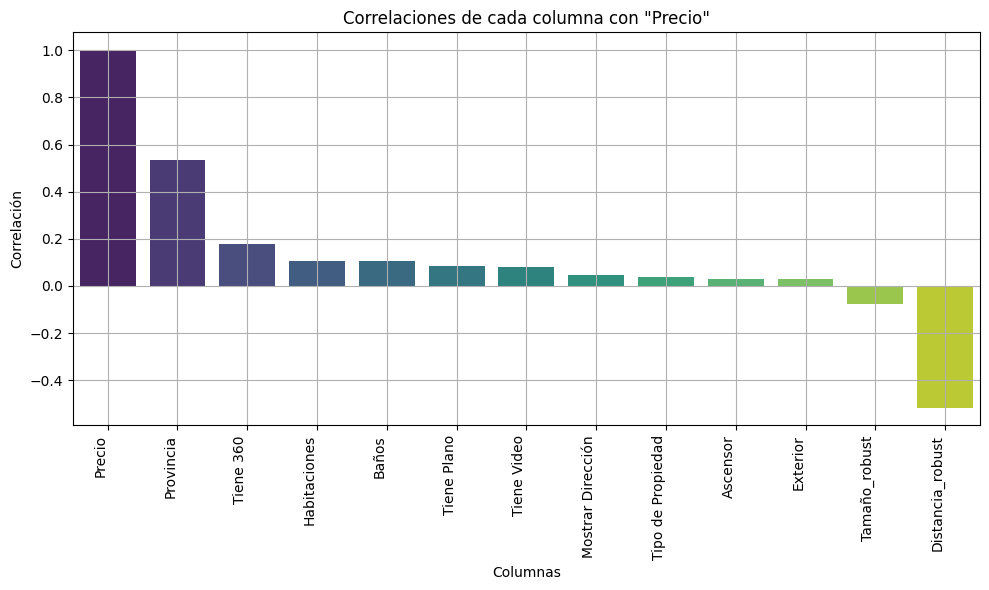


Columnas con baja correlación (abs < 0.05):
['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']


['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']

In [8]:
sp.analizar_correlaciones(df, "Precio", threshold=0.05)

In [9]:
# Excluir columnas irrelevantes según el análisis previo
columns_to_exclude = ['Mostrar Dirección', 'Tipo de Propiedad', 'Ascensor', 'Exterior']
df_filtered = df.drop(columns=columns_to_exclude)

In [10]:
# Definir las características (X) y la variable objetivo (y)
x2 = df_filtered.drop(columns=['Precio'])
y2 = df_filtered['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [11]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 4, 5], 
    'min_samples_split': [5, 10, 20],  
    'min_samples_leaf': [2, 5, 10]  
}

# Configurar el GridSearchCV
model_GradientBoostingRegressor2 = GridSearchCV(
    GradientBoostingRegressor(random_state=42), 
    param_grid, 
    cv=5,  
    scoring='neg_mean_squared_error',  
    verbose=2,
    n_jobs=-1  
)

# Ajustar el modelo con el conjunto de entrenamiento reducido
print("\n Iniciando búsqueda de hiperparámetros con GridSearchCV...\n")
model_GradientBoostingRegressor2.fit(x_train2, y_train2)

# Evaluar el modelo en el conjunto de validación
best_model2 = model_GradientBoostingRegressor2.best_estimator_


 Iniciando búsqueda de hiperparámetros con GridSearchCV...

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [12]:
# Predecir en los datos de prueba
y_pred_test2 = best_model2.predict(x_test2)
y_pred_train2 = best_model2.predict(x_train2)
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.764600,29.414900,1379.370400,37.139900
Test,0.405500,41.594000,2823.004100,53.131900
Diferenceia Train-Test,0.359100,-12.179100,-1443.633700,-15.992000
Porcentaje diferencia (%),88.557300,-41.404500,-104.658900,-43.058800
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.085592,5.194235,307.399782,6.603298
Influencia dif media (%),0.052500,1.781800,211.200900,2.339600
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.082401,5.000627,295.941866,6.357169
Influencia dif mediana (%),0.050600,1.715400,203.328700,2.252400


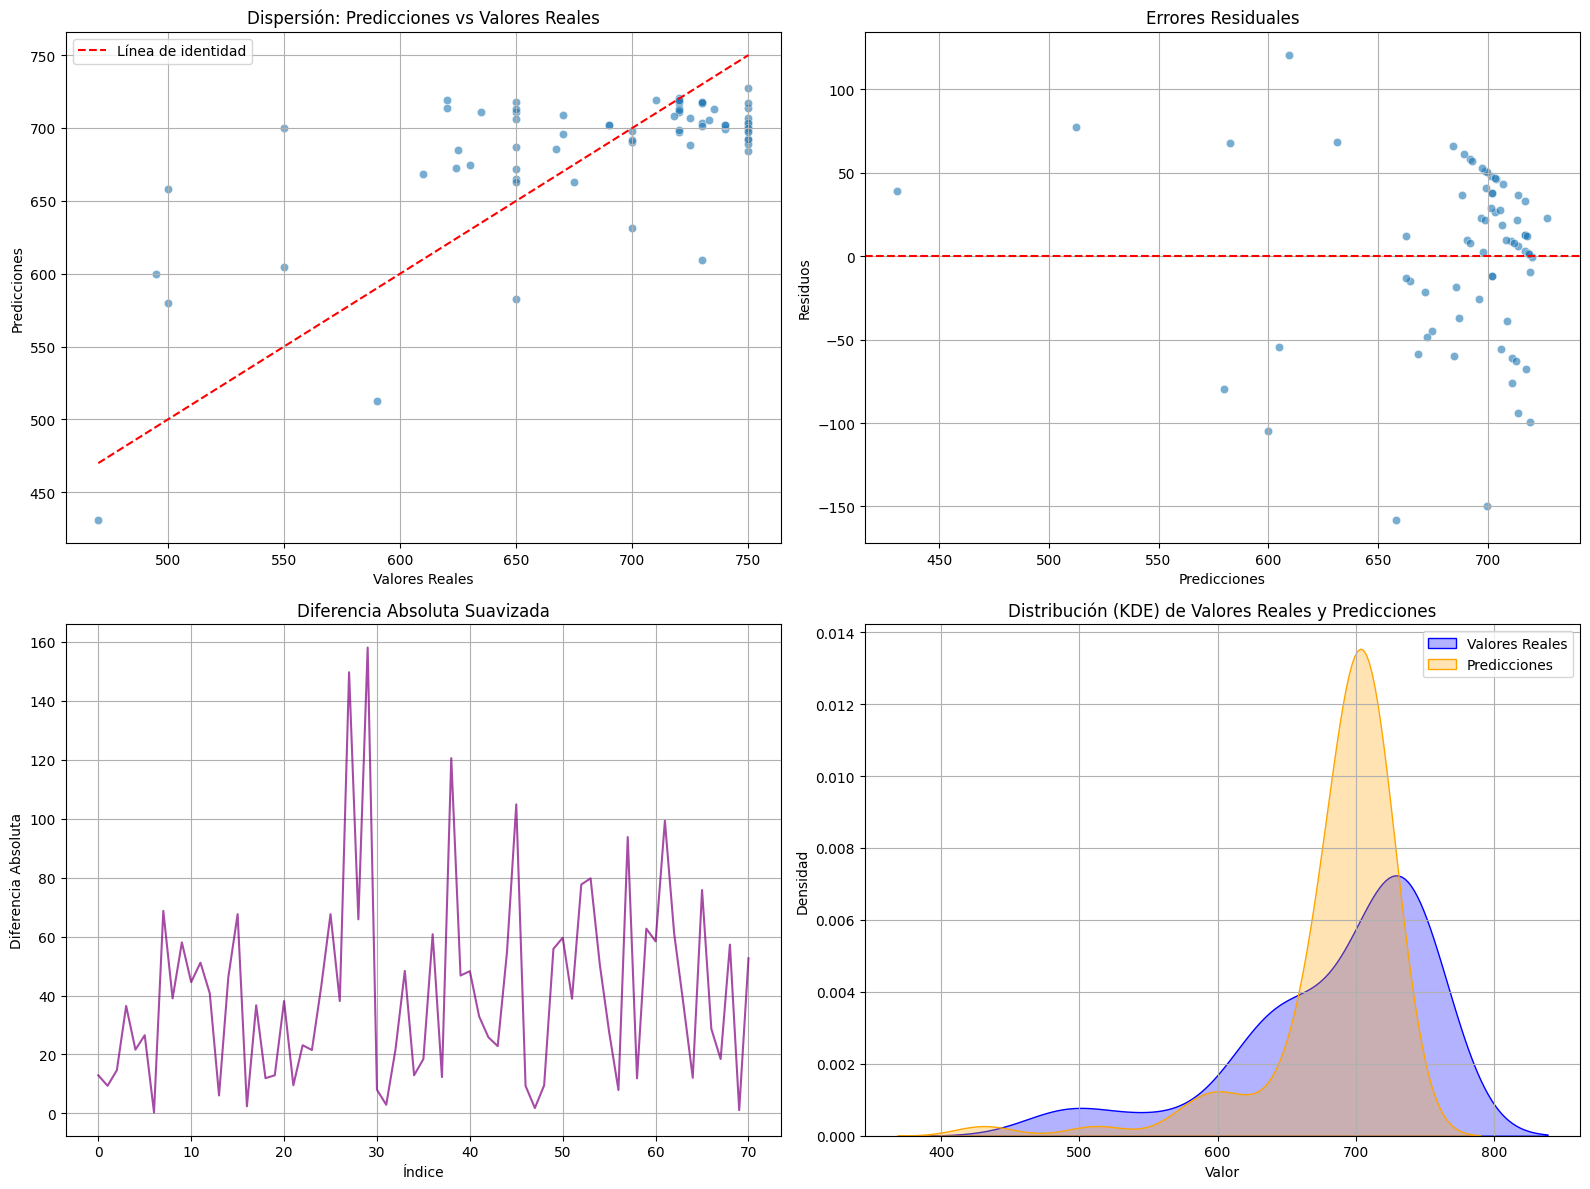

In [13]:
sp.comparativa_graficos( y_test2, y_pred_test2)

#### COMPARATIVA DE METRICAS

In [14]:
sp.metricas(y_train, y_train_pred, y_test, y_test_pred)

,r2_score,MAE,MSE,RMSE
Train,0.808500,25.595500,1122.256500,33.500100
Test,0.385200,41.945000,2919.503300,54.032400
Diferenceia Train-Test,0.423300,-16.349500,-1797.246800,-20.532300
Porcentaje diferencia (%),109.891000,-63.876500,-160.145800,-61.290300
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.087318,4.940525,295.650966,6.402921
Influencia dif media (%),0.061900,2.391900,262.933900,3.003800
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.084063,4.756373,284.630972,6.164261
Influencia dif mediana (%),0.059600,2.302700,253.133400,2.891900


In [15]:
sp.metricas(y_train2, y_pred_train2, y_test2, y_pred_test2)

,r2_score,MAE,MSE,RMSE
Train,0.764600,29.414900,1379.370400,37.139900
Test,0.405500,41.594000,2823.004100,53.131900
Diferenceia Train-Test,0.359100,-12.179100,-1443.633700,-15.992000
Porcentaje diferencia (%),88.557300,-41.404500,-104.658900,-43.058800
Media,683.535700,683.535700,683.535700,683.535700
Ratio Media(%),0.085592,5.194235,307.399782,6.603298
Influencia dif media (%),0.052500,1.781800,211.200900,2.339600
Mediana,710.000000,710.000000,710.000000,710.000000
Ratio Mediana(%),0.082401,5.000627,295.941866,6.357169
Influencia dif mediana (%),0.050600,1.715400,203.328700,2.252400


In [16]:
import pickle

# Guardar el modelo entrenado
with open('../../models/model_GradientBoostingRegressor2.pkl', 'wb') as file:
    pickle.dump(best_model2, file)